## Salary Assignment: An exploration of the various factors influencing salaries in a given data set

### The notebook prepared will inspect the salaries of employees surveyed about their income as well as some background information about them. The intent is to explore the various factors that could possibly influence their income - if there are any. All salaries are in American dollars for this assisgnment.

### Notebook Contents

### 1. Basic statistics 
#### The basic statistical information for the dataset is calculated and presented. This includes the total number of respondents, the minimum and maximum salary values, the mena and standard error of mean, the standard deviation for the years worked, the median and interquartile range for the salary sample. Where applicable, some visualizations will be included to better dispaly these statistics. 

### 2. Gender Statistics 
#### Some statiscal information and comparisons are observed for male and female respondents. The positions they hold are also taken into account. 

### 1. Basic Statistics

In [83]:
# Import all packages needed for the assisgnment
import numpy as np
import scipy
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statistics as stats
import plotly.graph_objects as go

In [84]:
salaries_df = pd.read_csv('salary.csv')
salaries_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [85]:
# The total number of respondents is calculated
num_respondents = len(salaries_df)
print('Number of survey respondents:' + ' ' + str(num_respondents))

Number of survey respondents: 514


In [86]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [87]:
# The null value is replaced with the salary mean value
salaries_df['salary'].fillna(value = salaries_df['salary'].mean(), inplace = True)

#### There are 514 survey respondents in total. However one of the values in the salary column is null. This may be that the respondent chose to leave that question out when answering the survey. This value is not dropped but is instead replaced with the mean salary value which amounts to 50 863.22.

In [88]:
# The lowest and highest salary values are calculated 
lowest_salary = salaries_df['salary'].min()
highest_salary = salaries_df['salary'].max()

print(lowest_salary, highest_salary)


29000.0 96156.0


#### The lowest salary is 29 000.00 and the highest salary is 95 156.00.

In [89]:
# The salary mean was calculated above in order to replace the null values and the standard error for the mean will be
# calculated below
salary_mean_error = scipy.stats.sem(salaries_df['salary'])
print(salary_mean_error)

558.9715980665014


#### The salary mean is 50 863.22 and the standard error of the mean is 558.97.

In [90]:
std_dev_yearsworked = stats.stdev(salaries_df['yearsworked'])
print(std_dev_yearsworked)

9.444695144169815


#### The standard deviation for the years worked is 9.44. This number represents the spread of data for the number of years worked for the 514 respondents.

In [91]:
# The median salary is calculated 
salary_median = salaries_df['salary'].median()
print(salary_median)

50165.5


#### The 'middle' value for the salaries is 50 165.50. This is the meausre of central tendency for the salries column and is not skewed by the maximum and minimum salaries values. 

In [92]:
# The IQR is calculated for the salary column 
salary_iqr = scipy.stats.iqr(salaries_df['salary'])
print(salary_iqr)

20306.25


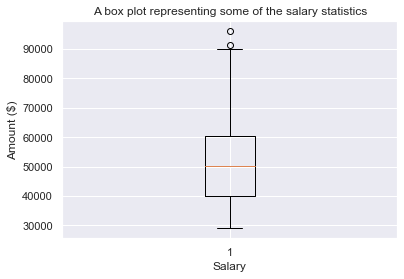

In [93]:
# A boxplot is created to graphically present the IQR for salaries 
sns.set()
_ = plt.boxplot(salaries_df['salary'])
_ = plt.xlabel('Salary')
_ = plt.ylabel('Amount ($)')
_ = plt.title('A box plot representing some of the salary statistics')
plt.show()


#### The graphic corresponds with the calculated value. Given that the IQR is the difference between the Q3 (top of the box) and Q1 (bottom of the box), the IQR is 20 306.25.

### 2. Gender Statistics  

In [94]:
# The number of male and female respondents are tabulated 
num_males = salaries_df['male'].value_counts()
print(num_males)
gender_table = go.Figure(data=[go.Table(header = dict(values = ['Male', 'Female']),
                                        cells = dict(values = [386, 128]))])
gender_table.show()

1    386
0    128
Name: male, dtype: int64


In [95]:
# The number of female executives are represented in a dataframe and then counted 
female_execs_df = salaries_df[(salaries_df.position == 3) & (salaries_df.male == 0)]
female_execs.head()
print('The number of female executives in the survey is' + ' ' + str(len(female_execs_df)))

The number of female executives in the survey is 19


In [126]:
# A nested for loop counts the number of respondents for each position by gender and returns the values in list.    
position_arr = []
for i in range(1, 4):
    position_list = [len(salaries_df[(salaries_df.position == i) & (salaries_df.male == n)]) for n in range(0, 2)]
    position_arr.append(position_list)
print(position_arr)       


[[60, 83], [49, 111], [19, 192]]


In [ ]:
# A bar graph is plotted to graphically represent the the respondents surveyed by gender and position held 
position_names = ['Juniors', 'Managers', 'Executives']
genders = ['Male', 'Female']
colours = ['#009E73', '#D55E00']
plt.xlabel('Position held')
plt.ylabel('Number of respondents')
plt.title('The positions held according to gender')
plt.xticks(i, position_names)
plt.legend()
plt.show()        

ValueError: shape mismatch: objects cannot be broadcast to a single shape

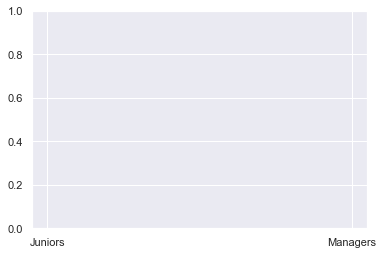

In [104]:


plt.bar(position_names, position_arr, stacked = True, color = colours, label = gender)


#### The number of female executives who responded to the survey are only 19. This means that women make up only 9% of total executives that responded to this survey. 

In [98]:
# The most popular respondent by position held 
positions = salaries_df.position.value_counts()
print(positions)

3    211
2    160
1    143
Name: position, dtype: int64


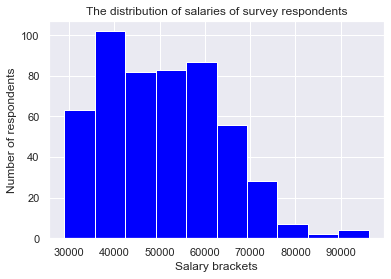

In [99]:
# A histogram is plotted for the salary column 
sns.set()
plt.hist(salaries_df.salary, color = 'blue')
plt.xlabel('Salary brackets')
plt.ylabel('Number of respondents')
plt.title('The distribution of salaries of survey respondents')
plt.show()

#### The histogram above informs us that there about 100 respondents who fall in the salary bracket between 35 000 - 42 000. This appears to be the highest number graphically but may not correspond with the information found in the cell above. This is because the largest number of respondents by position held were Executives. The likelihood of executives having a lower salary bracket than other positions surveyed is slim. This histogram of course only depicts salaries, so other factors that may contribute to the variance in salaries is excluded.

#### A second look at the histogram, observing the 42 000 - 62 000 salary bracket, tells us that there is a larger concentration of respondents that sit within this bracket. The amount is roughly 250 respondents. These respondents may be a mix of juniors, managers and executives across various industries and fields in different companies. 

#### The least number of respondents fell within the 82 000 - 89 000 salary bracket. 